In [42]:
import os
from pathlib import Path

import crystal_toolkit  # noqa: F401
from pymatgen.core import Structure

In [43]:
# Load a structure from a CIF or POSCAR file

batch_name = "bandgap3.5b1"
batch_path = "../output"
cif_name = "gen_7"
cif_path = os.path.abspath(
    os.path.join(batch_path, batch_name, "extracted", f"{cif_name}.cif")
)

print(f"Loading {cif_path}")

struct_expt = Structure.from_file(cif_path)
struct_expt

Loading d:\Projects\Sim\matsimx\matter\output\bandgap3.5b1\extracted\gen_7.cif


In [44]:
# Create output directory based on reduced formula
# get reduced formula

reduced_formula = struct_expt.composition.reduced_formula
print(f"Reduced formula: {reduced_formula}")

output_dir = f"{batch_name}-{cif_name}-{reduced_formula}"

# mkdir in output folder named reduced_formula
os.makedirs(f"output/{output_dir}", exist_ok=True)

Reduced formula: InF3


## pbe

In [45]:
# Relax with pbe

import matcalc

calculator_pbe = matcalc.load_fp("pbe")
relax_calc = matcalc.RelaxCalc( # type: ignore
    calculator_pbe,
    optimizer="FIRE",
    relax_atoms=True,
    relax_cell=True
)

data = relax_calc.calc(struct_expt)

final_structure_pbe = data['final_structure']
print(final_structure_pbe)
final_structure_pbe.to(fmt="poscar", filename=f"output/{output_dir}/POSCAR-pbe")

Full Formula (In2 F6)
Reduced Formula: InF3
abc   :   5.578214   5.577170   5.830665
angles:  61.377315  61.414541  59.994259
pbc   :       True       True       True
Sites (8)
  #  SP           a         b         c
---  ----  --------  --------  --------
  0  In    0.386796  0.809525  0.832726
  1  In    0.886568  0.309662  0.332655
  2  F     0.240831  0.059356  0.082558
  3  F     0.532965  0.559479  0.582792
  4  F     0.741095  0.955108  0.582136
  5  F     0.136592  0.163374  0.582161
  6  F     0.637045  0.455339  0.082746
  7  F     0.032326  0.663841  0.083134


'In2 F6\n1.0\n   4.8982543945312500    0.0000000000000000    2.6690025329589839\n   1.7204680720538190    4.5833301691662394    2.6716842651367183\n   0.0000000000000000    0.0000000000000000    5.8306651115417480\nIn F\n2 6\ndirect\n   0.3867959082126617    0.8095245361328126    0.8327264785766602 In\n   0.8865684270858765    0.3096616864204407    0.3326552808284760 In\n   0.2408314496278763    0.0593555793166161    0.0825579762458802 F\n   0.5329650044441222    0.5594788789749146    0.5827916860580445 F\n   0.7410947680473328    0.9551075100898743    0.5821361541748048 F\n   0.1365919411182404    0.1633736193180085    0.5821611285209656 F\n   0.6370449662208556    0.4553390145301818    0.0827458426356317 F\n   0.0323255583643913    0.6638406515121459    0.0831336975097657 F\n'

In [46]:
phonon_calc = matcalc.PhononCalc(  # type: ignore
    calculator_pbe,
    relax_structure=True,
    write_band_structure=f"output/{output_dir}/pbe_phonon_bs.yaml",
    write_total_dos=f"output/{output_dir}/pbe_phonon_dos.dat",
    write_phonon=f"output/{output_dir}/pbe_phonon.yaml",
    optimizer="FIRE",
)

data_phonon_pbe = phonon_calc.calc(final_structure_pbe)

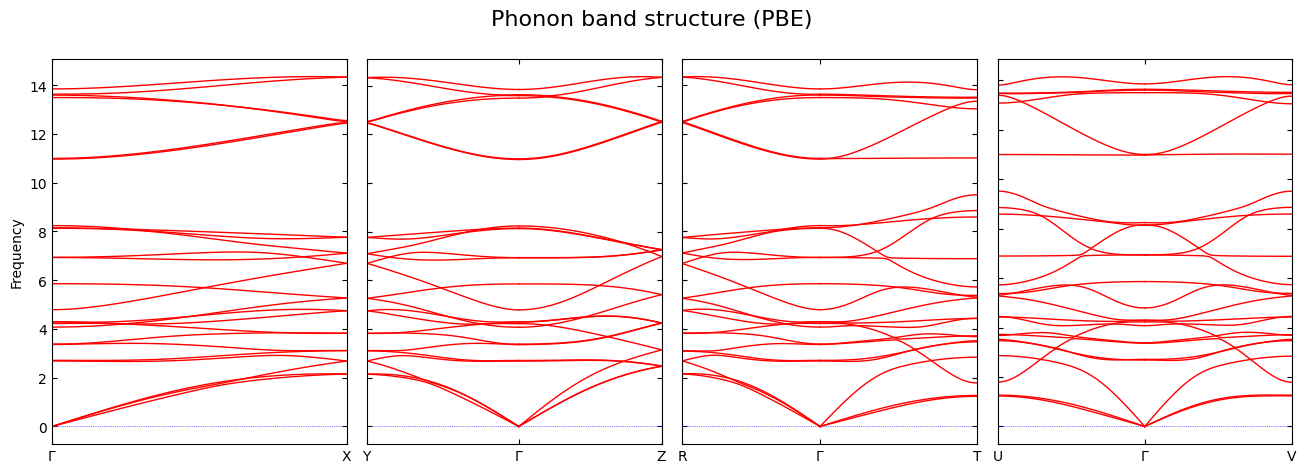

In [47]:
import matplotlib.pyplot as plt

phonon_bs = data_phonon_pbe["phonon"].band_structure

n_axes = sum(1 for c in phonon_bs.path_connections if not c)

fig, axs = plt.subplots(1, n_axes, figsize=(16, 5))

if n_axes == 1:
    axs = [axs]

for ax in axs[1:]:
    ax.set_ylabel("")
    ax.tick_params(axis="y", labelleft=False)

phonon_bs.plot(ax=axs)
fig.suptitle("Phonon band structure (PBE)", fontsize=16)
plt.subplots_adjust(wspace=0.07)

# Save figure
fig.savefig(f"output/{output_dir}/pbe_phonon_band.png", dpi=300, bbox_inches="tight")

plt.show()

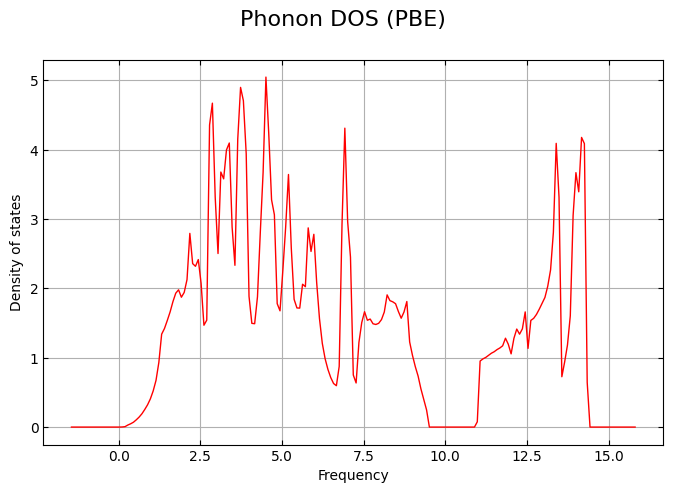

In [48]:
phonon_dos = data_phonon_pbe["phonon"].total_dos

fig, ax = plt.subplots(figsize=(8, 5))
phonon_dos.plot(ax=ax)
fig.suptitle("Phonon DOS (PBE)", fontsize=16)

# Save figure
fig.savefig(f"output/{output_dir}/pbe_phonon_dos.png", dpi=300, bbox_inches="tight")
plt.show()

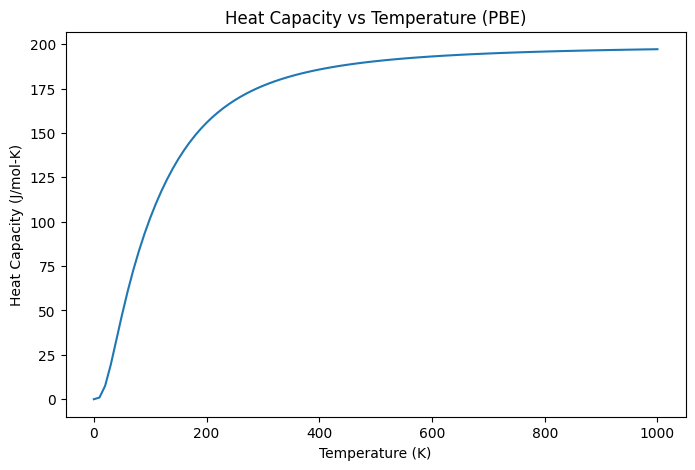

In [49]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(
    data_phonon_pbe["thermal_properties"]["temperatures"],
    data_phonon_pbe["thermal_properties"]["heat_capacity"],
)

ax.set_xlabel("Temperature (K)")
ax.set_ylabel("Heat Capacity (J/mol-K)")
ax.set_title("Heat Capacity vs Temperature (PBE)")

# Save figure
fig.savefig(f"output/{output_dir}/pbe_heat_capacity.png", dpi=300, bbox_inches="tight")
plt.show()

## r2scan

In [50]:
# Relax with r2scan

import matcalc

calculator_r2scan = matcalc.load_fp("r2scan")
relax_calc = matcalc.RelaxCalc( # type: ignore
    calculator_r2scan, optimizer="FIRE", relax_atoms=True, relax_cell=True
)

data_r2scan = relax_calc.calc(struct_expt)

final_structure_r2scan = data_r2scan["final_structure"]
print(final_structure_r2scan)
final_structure_r2scan.to(fmt="poscar", filename=f"output/{output_dir}/POSCAR-r2scan")

Full Formula (In2 F6)
Reduced Formula: InF3
abc   :   5.547129   5.545518   5.797000
angles:  61.378756  61.400182  59.990183
pbc   :       True       True       True
Sites (8)
  #  SP           a         b         c
---  ----  --------  --------  --------
  0  In    0.386705  0.809518  0.832639
  1  In    0.886755  0.309464  0.332581
  2  F     0.239396  0.059613  0.082584
  3  F     0.534184  0.559328  0.582808
  4  F     0.739617  0.956465  0.582357
  5  F     0.13695   0.161937  0.582564
  6  F     0.636747  0.456782  0.082536
  7  F     0.033865  0.662574  0.082839


'In2 F6\n1.0\n   4.8707718610606809   -0.0000956652297450    2.6544710011947665\n   1.7111665140778776    4.5572569331139396    2.6563288672621916\n   0.0010459005853870   -0.0003032005926696    5.7970002229804622\nIn F\n2 6\ndirect\n   0.3867052315792668    0.8095181417144559    0.8326390277691007 In\n   0.8867548551640000    0.3094637422399254    0.3325813667575217 In\n   0.2393959382953571    0.0596134523580861    0.0825843195727960 F\n   0.5341839349308105    0.5593276414838783    0.5828079727587904 F\n   0.7396165163551774    0.9564651602605798    0.5823573547197604 F\n   0.1369499335826652    0.1619372139569602    0.5825635595569270 F\n   0.6367466438344598    0.4567821396016668    0.0825355707263195 F\n   0.0338649688282455    0.6625739840930711    0.0828390731374084 F\n'

In [51]:
phonon_calc = matcalc.PhononCalc(  # type: ignore
    calculator_r2scan,
    relax_structure=True,
    write_band_structure=f"output/{output_dir}/r2scan_phonon_bs.yaml",
    write_total_dos=f"output/{output_dir}/r2scan_phonon_dos.dat",
    write_phonon=f"output/{output_dir}/r2scan_phonon.yaml",
    optimizer="FIRE",
)

data_phonon_r2scan = phonon_calc.calc(final_structure_r2scan)

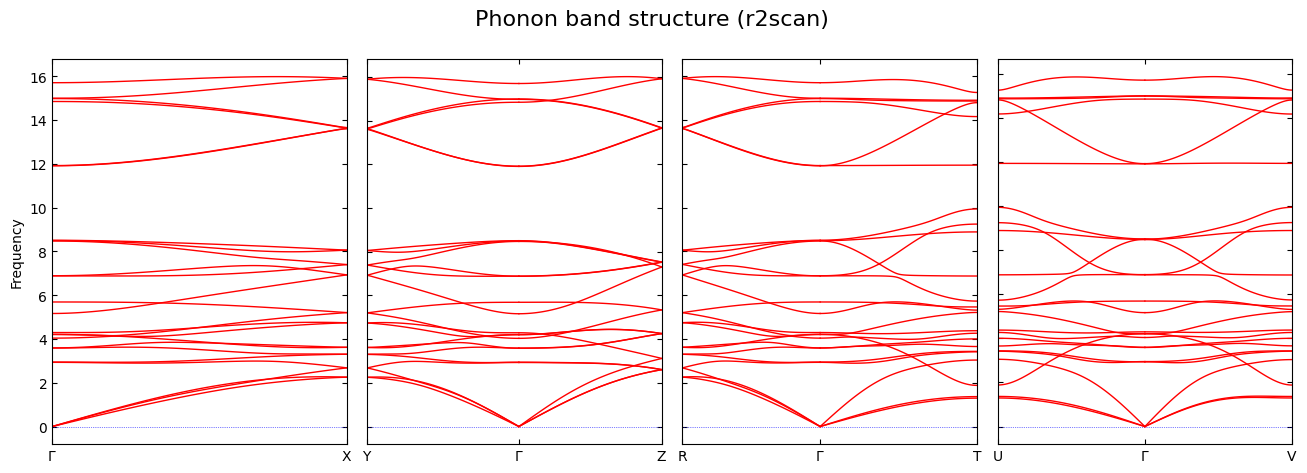

In [52]:
import matplotlib.pyplot as plt

phonon_bs = data_phonon_r2scan["phonon"].band_structure

n_axes = sum(1 for c in phonon_bs.path_connections if not c)

fig, axs = plt.subplots(1, n_axes, figsize=(16, 5))

if n_axes == 1:
    axs = [axs]

for ax in axs[1:]:
    ax.set_ylabel("")
    ax.tick_params(axis="y", labelleft=False)

phonon_bs.plot(ax=axs)
fig.suptitle("Phonon band structure (r2scan)", fontsize=16)
plt.subplots_adjust(wspace=0.07)

# Save figure
fig.savefig(f"output/{output_dir}/r2scan_phonon_band.png", dpi=300, bbox_inches="tight")
plt.show()

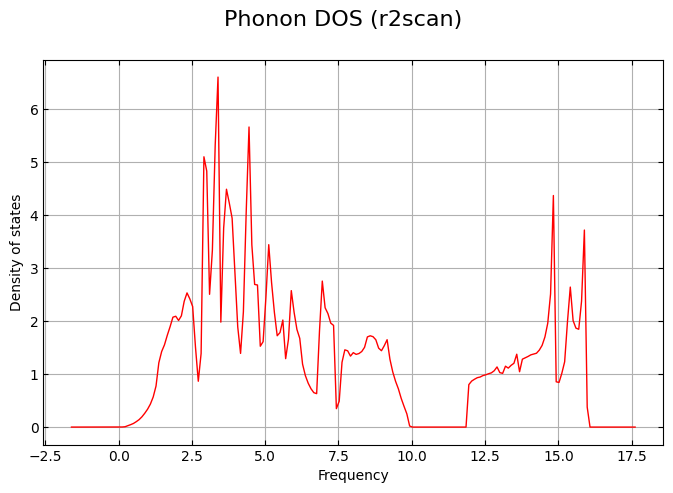

In [53]:
phonon_dos = data_phonon_r2scan["phonon"].total_dos

fig, ax = plt.subplots(figsize=(8, 5))
phonon_dos.plot(ax=ax)
fig.suptitle("Phonon DOS (r2scan)", fontsize=16)

# Save figure
fig.savefig(f"output/{output_dir}/r2scan_phonon_dos.png", dpi=300, bbox_inches="tight")
plt.show()

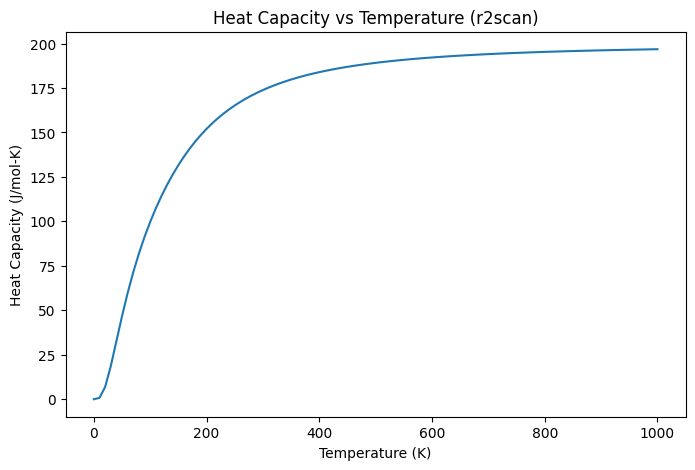

In [54]:
# Heat capacity for r2scan
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(
    data_phonon_r2scan['thermal_properties']['temperatures'],
    data_phonon_r2scan['thermal_properties']['heat_capacity']
)

ax.set_xlabel("Temperature (K)")
ax.set_ylabel('Heat Capacity (J/mol-K)')
ax.set_title("Heat Capacity vs Temperature (r2scan)")

# Save figure
fig.savefig(f"output/{output_dir}/r2scan_heat_capacity.png", dpi=300, bbox_inches="tight")
plt.show()

❌ Imaginary frequencies detected (min = -0.005 THz). Material unstable.


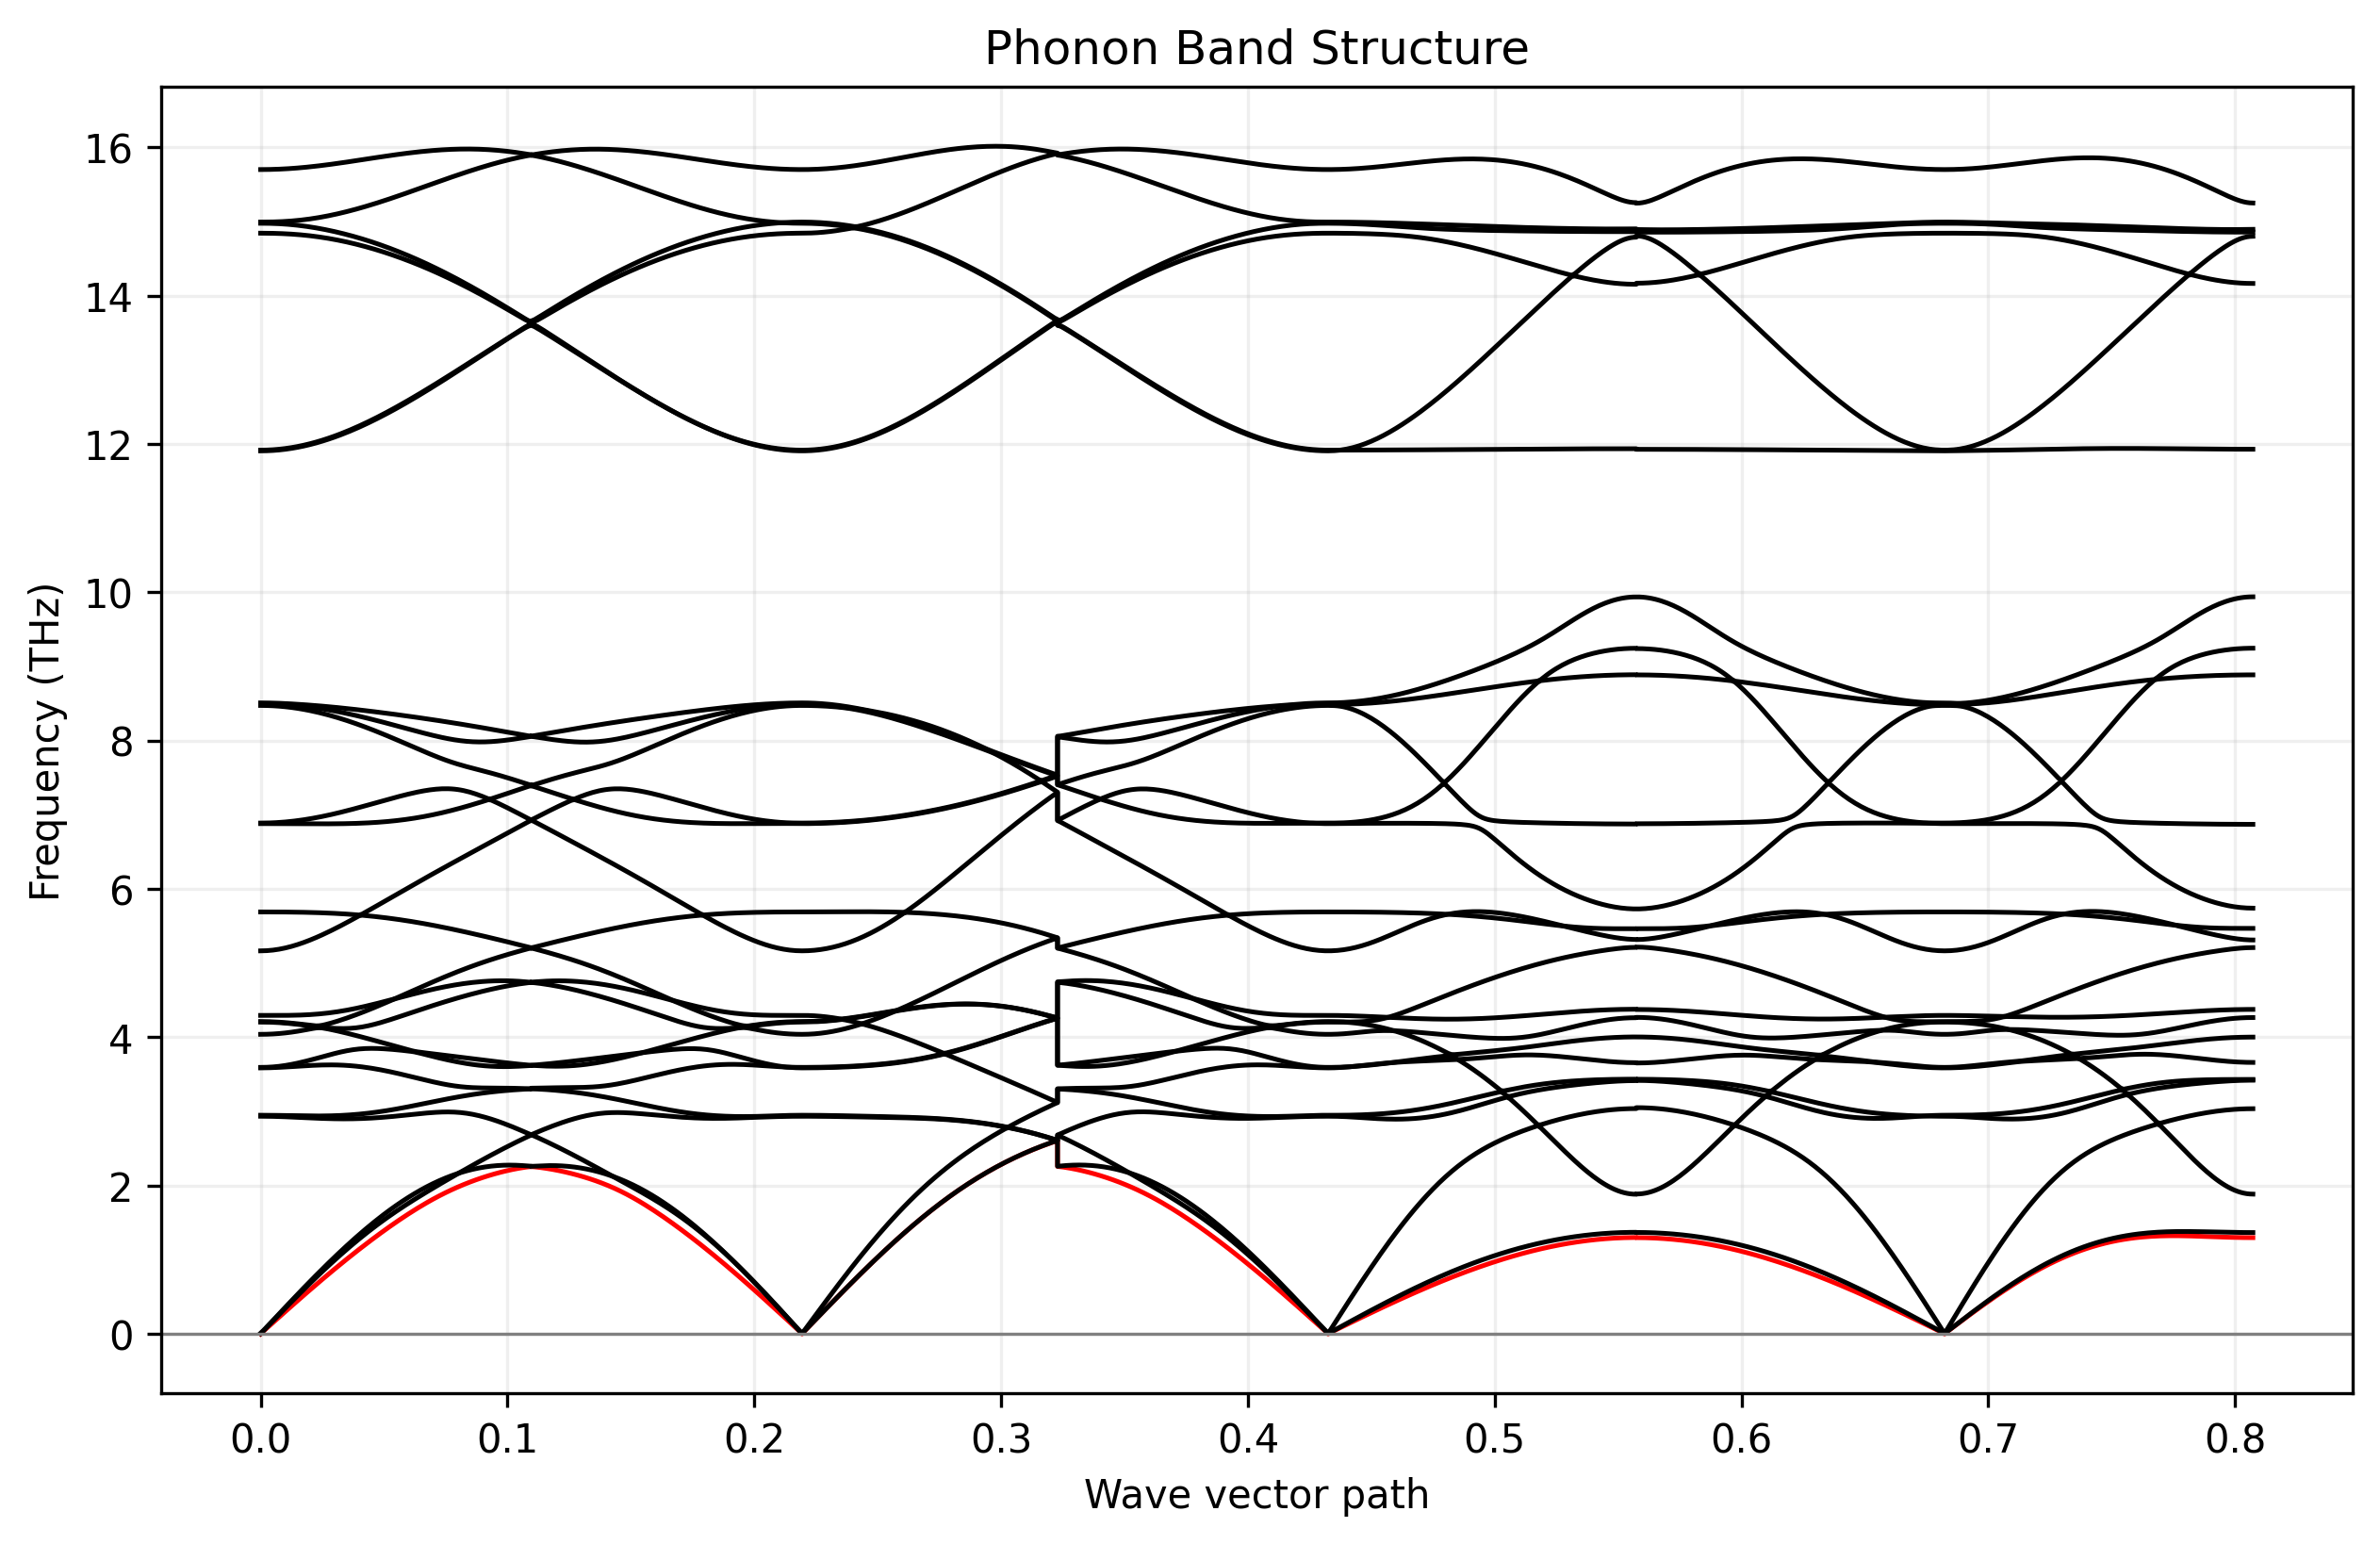

In [55]:
import yaml
import numpy as np
import matplotlib.pyplot as plt
from pymatgen.core import Structure


def plot_phonon_band(band_yaml_file, structure_file, ax=None):
    """
    Plot phonon dispersion directly from band.yaml (even if 'lattice_rec' is missing).
    Imaginary frequencies are shown in red.
    If ax is provided, plot on it; otherwise create a new figure/axes.
    Returns (fig, ax, min_freq).
    """
    try:
        # Load structure if needed (not used directly here, but kept for parity)
        _structure = Structure.from_file(structure_file)

        with open(band_yaml_file, "r") as f:
            data = yaml.safe_load(f)

        q_labels = [p["label"] if "label" in p else "" for p in data.get("labels", [])]
        q_distances = []
        frequencies = []

        # Extract phonon data
        for point in data["phonon"]:
            q_distances.append(point["distance"])
            freqs = [band["frequency"] for band in point["band"]]
            frequencies.append(freqs)

        q_distances = np.array(q_distances)
        frequencies = np.array(frequencies)

        created_fig = None
        if ax is None:
            created_fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

        # Plot
        for i in range(frequencies.shape[1]):
            freq_branch = frequencies[:, i]
            ax.plot(
                q_distances,
                freq_branch,
                color="red" if np.any(freq_branch < 0) else "black",
                lw=1.2,
            )

        ax.axhline(0, color="gray", lw=0.8)
        ax.set_xlabel("Wave vector path")
        ax.set_ylabel("Frequency (THz)")
        ax.set_title("Phonon Band Structure")
        ax.grid(alpha=0.2)

        min_freq = float(np.min(frequencies))
        if min_freq < 0:
            print(
                f"❌ Imaginary frequencies detected (min = {min_freq:.3f} THz). Material unstable."
            )
        else:
            print(
                f"✅ All frequencies positive (min = {min_freq:.3f} THz). Material stable."
            )

        return created_fig, ax, min_freq

    except Exception as e:
        print(f"⚠️ Error while plotting phonon band: {e}")
        return None, None, None


band_file = f"output/{output_dir}/r2scan_phonon_bs.yaml"
structure_file = f"output/{output_dir}/POSCAR-r2scan"

# Use fig/ax and save
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
_, _, min_freq = plot_phonon_band(band_file, structure_file, ax=ax)

# Save figure
fig.savefig(
    f"output/{output_dir}/r2scan_phonon_band_from_yaml.png",
    dpi=300,
    bbox_inches="tight",
)
plt.show()

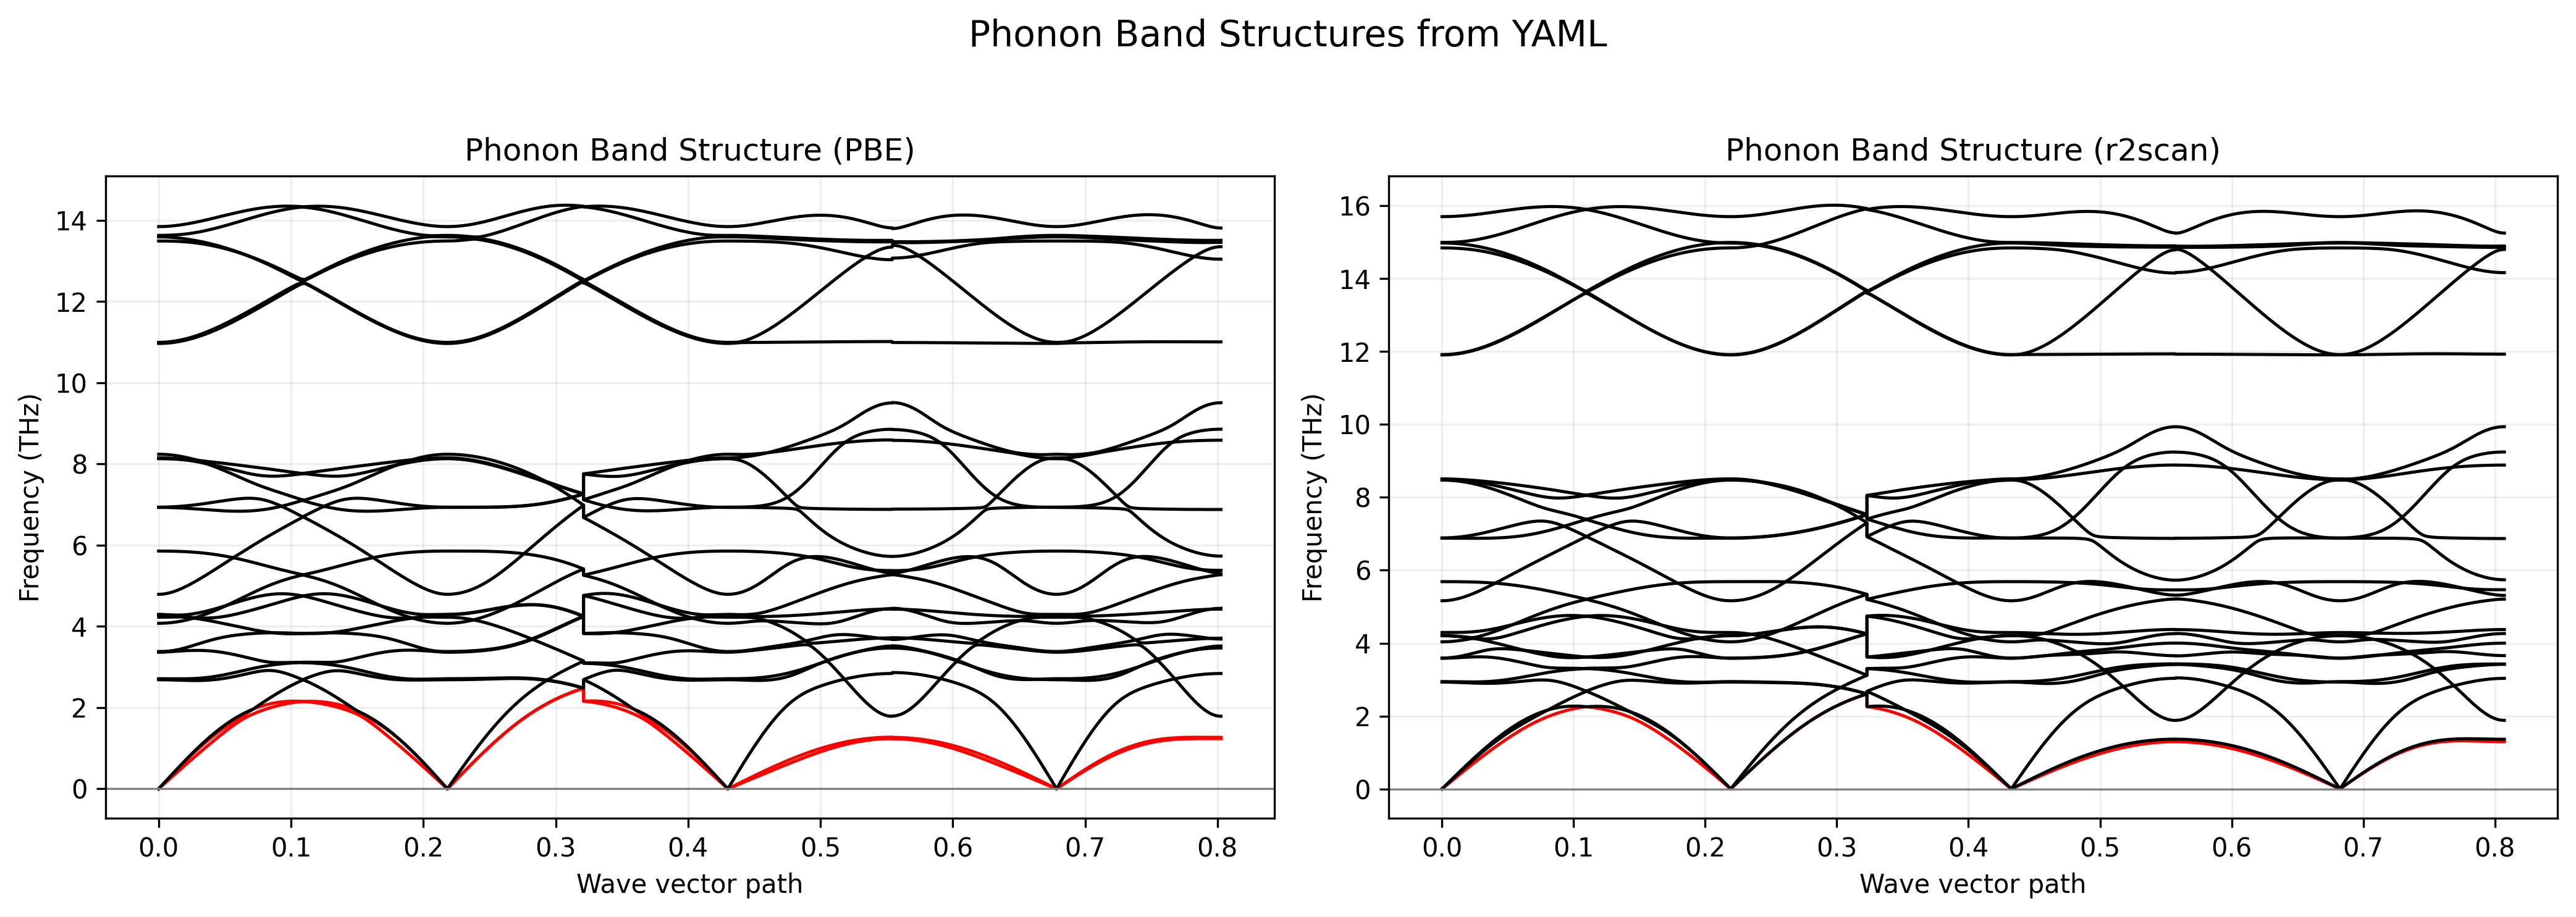

PBE min frequency: -0.007 THz -> unstable (imaginary)
r2scan min frequency: -0.005 THz -> unstable (imaginary)


In [56]:
import yaml
import numpy as np
import matplotlib.pyplot as plt


def plot_phonon_band_yaml(ax, band_yaml_file, title=None):
    """
    Plot phonon dispersion directly from band.yaml onto the provided Axes.
    Imaginary frequencies are shown in red.
    Returns the minimum frequency (THz).
    """
    with open(band_yaml_file, "r") as f:
        data = yaml.safe_load(f)

    q_distances = []
    frequencies = []

    for point in data["phonon"]:
        q_distances.append(point["distance"])
        freqs = [band["frequency"] for band in point["band"]]
        frequencies.append(freqs)

    q_distances = np.array(q_distances)
    frequencies = np.array(frequencies)

    for i in range(frequencies.shape[1]):
        freq_branch = frequencies[:, i]
        ax.plot(
            q_distances,
            freq_branch,
            color="red" if np.any(freq_branch < 0) else "black",
            lw=1.2,
        )

    ax.axhline(0, color="gray", lw=0.8)
    ax.set_xlabel("Wave vector path")
    ax.set_ylabel("Frequency (THz)")
    if title:
        ax.set_title(title)
    ax.grid(alpha=0.2)

    return float(np.min(frequencies))


# Paths from earlier blocks
pbe_band_file = f"output/{output_dir}/pbe_phonon_bs.yaml"
r2scan_band_file = f"output/{output_dir}/r2scan_phonon_bs.yaml"

# Side-by-side comparison
fig, axs = plt.subplots(1, 2, figsize=(14, 5), dpi=300)

min_pbe = plot_phonon_band_yaml(
    axs[0], pbe_band_file, title="Phonon Band Structure (PBE)"
)
min_r2 = plot_phonon_band_yaml(
    axs[1], r2scan_band_file, title="Phonon Band Structure (r2scan)"
)

fig.suptitle("Phonon Band Structures from YAML", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save combined figure
fig.savefig(
    f"output/{output_dir}/phonon_band_PBE_vs_r2scan.png", dpi=300, bbox_inches="tight"
)
plt.show()

# Stability messages
print(
    f"PBE min frequency: {min_pbe:.3f} THz -> {'unstable (imaginary)' if min_pbe < 0 else 'stable'}"
)
print(
    f"r2scan min frequency: {min_r2:.3f} THz -> {'unstable (imaginary)' if min_r2 < 0 else 'stable'}"
)

In [57]:
# Append a compact summary line for this sample:
# structure_name, reduced_formula, spacegroup, stable|unstable

import os
import yaml
import numpy as np


def min_freq_from_band_yaml(band_yaml_file: str) -> float | None:
    try:
        with open(band_yaml_file, "r") as f:
            data = yaml.safe_load(f)
        freqs = np.array([[b["frequency"] for b in p["band"]] for p in data["phonon"]])
        return float(np.min(freqs))
    except Exception:
        return None


# Choose a structure name for logging (use your CIF name or any identifier you prefer)
structure_name = cif_name  # or f"{batch_name}-{cif_name}"

# Prefer space group from relaxed r2scan structure, then PBE, then experimental
try:
    sgsym, sgnum = final_structure_r2scan.get_space_group_info()
    ref_structure = "r2scan"
except Exception:
    try:
        sgsym, sgnum = final_structure_pbe.get_space_group_info()
        ref_structure = "pbe"
    except Exception:
        sgsym, sgnum = struct_expt.get_space_group_info()
        ref_structure = "expt"

spacegroup_str = f"{sgsym} (#{sgnum})"

# Decide stability: prefer r2scan band.yaml if present, else PBE
pbe_band_file = f"output/{output_dir}/pbe_phonon_bs.yaml"
r2_band_file = f"output/{output_dir}/r2scan_phonon_bs.yaml"

min_r2 = min_freq_from_band_yaml(r2_band_file) if os.path.exists(r2_band_file) else None
min_pbe = (
    min_freq_from_band_yaml(pbe_band_file) if os.path.exists(pbe_band_file) else None
)

# Use r2scan if available, else PBE
chosen_min = min_r2 if min_r2 is not None else min_pbe
stable = (chosen_min is not None) and (chosen_min >= -1e-4)  # small tolerance

# Append one line to a global summary file
summary_path = os.path.join("output", "samples_summary.txt")
os.makedirs(os.path.dirname(summary_path), exist_ok=True)

line = f"{structure_name}\t{reduced_formula}\t{spacegroup_str}\t{'stable' if stable else 'unstable'}\n"
with open(summary_path, "a", encoding="utf-8") as f:
    f.write(line)

print(f"Appended to {summary_path}: {line.strip()}")

Appended to output\samples_summary.txt: gen_7	InF3	R-3c (#167)	unstable
